# Distribución binomial

In [16]:
# Librerias para los ejemplos
import numpy as np
# generador aleatorio de números basados en la distribución binomial:
from numpy.random import binomial 
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencia de eventos tipo Bernoulli
$$
P(k;n,p) = {\dbinom n k }p^k(1-p)^{n-k} = {\frac {n!}{k!(n-k)!}}p^k(1-p)^{n-k}
$$

Secuencia de eventos tipo Bernoulli también la podemos encontrar como **distribución binomial**, la formula de arriba es la "_formula general_" de dicha distribución.

Definición manual en `python`:

In [17]:
# k: Número de exitos
# n: Total de sucesos
# p: probabilidad de éxito de un suceso individual
def manual_binomial(k, n, p):
  combinator = factorial(n) / (factorial(k) * factorial(n-k))
  return combinator * pow(p, k) * pow(1-p, n-k)

Enunciado: Dada una moneda justa con una probabilidad de `0.5` de que al lanzarla obtengamos cara 🙃 o cruz ➕, ¿cuál es la probabilidad de que obtener `2` caras en `3` lanzamientos?.

Aplicamos la función de arriba nos deberia dar un resultado de `3/8` o lo que es lo mismo `0.375`

In [18]:
manual_binomial(2, 3, 0.5)

0.375

Comprobación mediante la función `binom` de la libreria `scipy`:

In [19]:
dist = binom(3, 0.5)
dist.pmf(2) # Probability Mass Function -> Función de densidad de probabilidad

0.3750000000000001

## Distribución acumulada


Enunciado: Dada una moneda justa con una probabilidad de `0.5` de que al lanzarla obtengamos cara 🙃 o cruz ➕, ¿cuál es la probabilidad de que obtener `0, 1 ó 2` caras en `3` lanzamientos?.

Del enunciado se destaca que necesitamos obtener las probabilidades de obtener 0 caras, 1 cara o 2 caras, en esos caso aplicamos la formula de la `probabilidad acumulada para valores discretos` que en realidad es la suma de cada probabilidad individual.

Matemáticamente lo podemos representar de la siguiente manera:

$$
  P(k \eqslantless 2;n = 3,p = 0.5) = \sum_{k=0}^2 	[{\dbinom n k }p^k(1-p)^{n-k}] = \frac 7 8
$$

`binom` de la libreria `scipy` la formula anterior se resume a una sola línea de código:

In [20]:
k, n, p = 2, 3, 0.5
binom(n,p).cdf(k) # Comulative density function

0.875

Comprobación manual de la distrubución acumulada dado el enunciado anterior.

In [21]:
n, p = 3, 0.5
acum = 0
for k in range(3):
  acum += manual_binomial(k, n, p)

print(acum)

0.875


## Simulación de secuencias
Aplicación de generadores aleatorios para simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

Con la función `binomial` de la libreria `numpy.random` generamos una simulación de lanzar una moneda, donde:
- `n`: Número de lanzamientos.
- `p`: Probabilidad individual. `0.5` asumiendo que la moneda esta balanceda.
- `size`: Número de veces que se repetira el experimento
- `resultado`: Número de caras obtenido al lanzar `n` veces la moneda.

> 📌 NOTA: El significado de los parámetros van de la mano con el ejercicio del lanzamiendo de una moneda, y sobre esté mismo se realizará la simulación. 

Ejemplo de la función `binomial`:

In [22]:
binomial(n=3, p=0.5)

1

Generando la simulación y su respectiva visualización:

La función `unique` de `numpy` regresa 2 arreglos
- `[0]`: Arreglo de valores evaludados (o bien encontrados en el array de entrada).
- `[1]`: Arreglo con el conteo de las apariciones de los elementos evaluados.

In [23]:
def plot_hist(n, p, total_trials):
  values = [0, 1, 2, 3] # Cantidad de caras posibles de obtener al lanzar una moneda 3 veces.\
  samples = binomial(n, p, total_trials)
  # Probabilidad simulada
  sim = np.unique(samples, return_counts=True)[1]/len(samples)

  # Probabilidad teorica (o reales) de obtener k caras en los n lanzamientos
  # también considerada la probabilidad real
  teorica = [binom(n, p).pmf(k) for k in values]

  # Visualización de la simulación
  plt.bar(x=values, height=sim, color='red')
  plt.bar(x=values, height=teorica, color='blue', alpha=0.5)
  plt.title(f'{total_trials} Samples')
  plt.show()

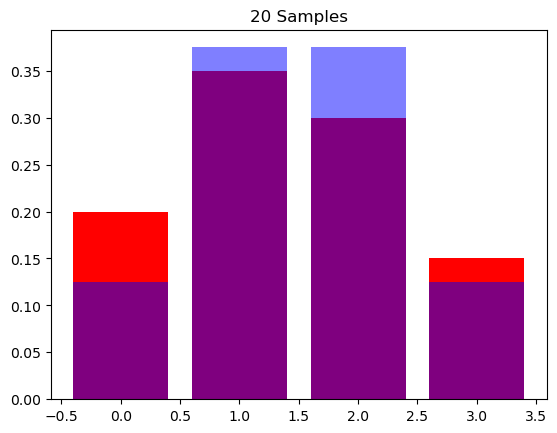

In [24]:
plot_hist(3, 0.5, 20)

La simulación de un número muy grande de experimentos aleatorios para calcular probabilidades va de la mano con la llamada _escuela frecuentista_ que dice:

> Los números de probabilidad se dan al hacer infinitas pruebas de un mismo experimento

En otras palabras del enunciado "_a mayor número de experimientos más nos acercamos al número real de proabilidad de un evento_".

Y justo esto se quiere evidencial con la función `plot_hist`, donde al simular la mayor cantidad de pruebas nos vamos acercando a la probabilidad real de que un evento ocurra.

En la gráfica que dibuja la función obtenemos en color rojo el calculo de probabilidad de la simulación y en color azul la probabilidad teorica (o bien probabilidad "real").

A continuación se aprecia visualmente como al aumentar el número de pruebas tanto la probabilidad simulada como la probabilidad teorica se acecan.

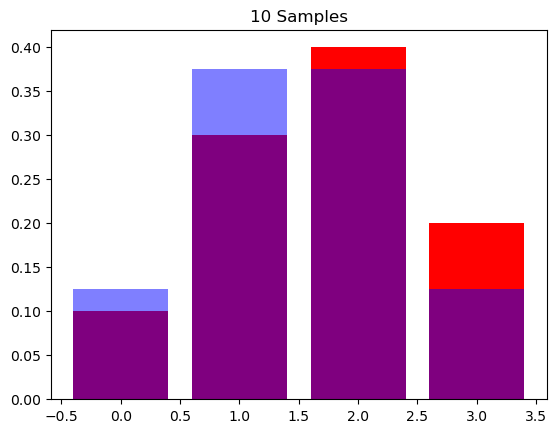

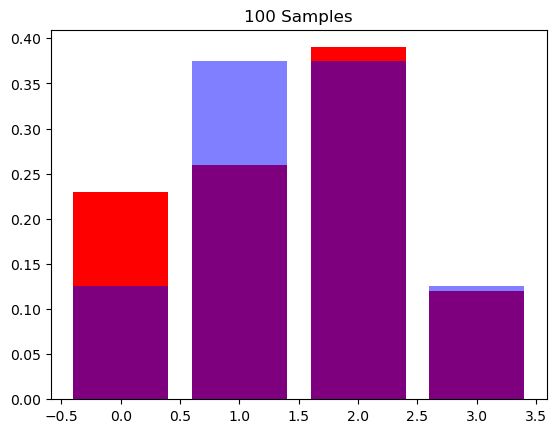

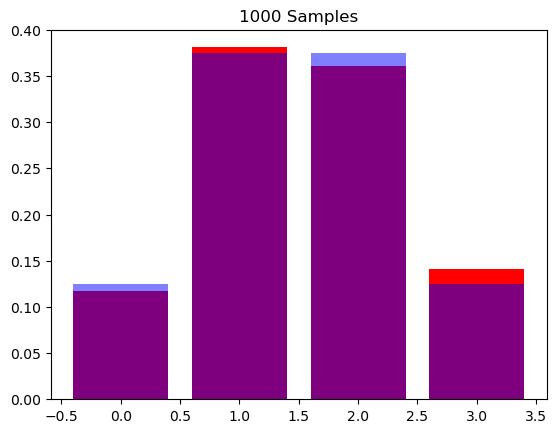

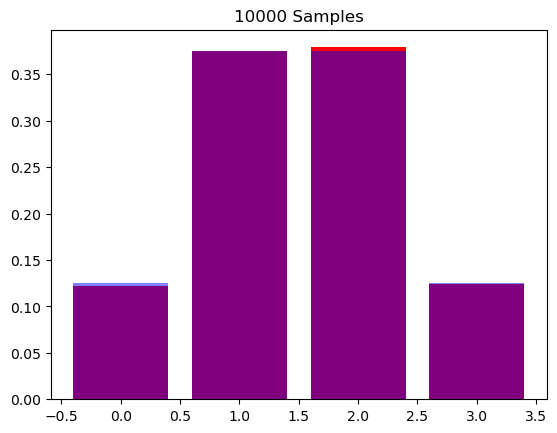

In [26]:
plot_hist(3, 0.5, 10)
plot_hist(3, 0.5, 100)
plot_hist(3, 0.5, 1000)
plot_hist(3, 0.5, 10000)
